In [1]:
import os
import os.path as path
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.models import load_model

In [2]:
current_dir = os.path.join(os.getcwd())
file = os.path.join(path.dirname(path.dirname(current_dir)), "generate_data\data_cwa.csv")
myData = pd.read_csv(file, delimiter=',', usecols=['cwa','credit','time','difficulty', 'score'])
my_data_copy = myData
myData.shape

(180346, 5)

In [3]:
myData["score"] = myData["score"].values / 100
myData["cwa"] = myData["cwa"].values / 100
myData["credit"] = myData["credit"].values / 6
myData ["difficulty"] = myData['difficulty'].values / 5
myData["time"] = myData["time"].values / 6

In [4]:
df = pd.DataFrame(myData)
df = df.sample(frac=1)

myData = df


In [5]:
myData

,cwa,credit,time,difficulty,score
82352,0.6078,0.333333,0.208333,0.2,0.63
90062,0.6220,0.333333,0.416667,1.0,0.64
69548,0.6190,0.500000,0.208333,1.0,0.55
15313,0.7866,0.166667,0.416667,0.2,0.86
152298,0.5113,0.500000,0.166667,0.4,0.71
...,...,...,...,...,...
46130,0.6656,0.333333,0.250000,1.0,0.65
5339,0.8022,0.166667,0.375000,0.6,0.90
111865,0.5585,0.166667,0.250000,0.8,0.70
13896,0.7703,0.333333,0.750000,0.8,0.90


In [6]:
targets = myData[['score']].values
myData.drop(('score'), axis=1, inplace=True)
data = myData.values

print(targets.shape)
print(data.shape)

(180346, 1)
(180346, 4)


In [7]:
num_train = int(0.5 * len(data)) 
num_val = int(0.25 * len(data))
num_test = int(0.25 * len(data))

In [8]:
train_data = data[0 : num_train]
test_data = data[num_train: num_train + num_test]
val_data = data[num_train + num_test:]

train_targets = targets[0 : num_train]
test_targets = targets[num_train: num_train + num_test]
val_targets = targets[num_train + num_test:]

print(len(train_data) + len(test_data) + len(val_data))
print(len(train_targets) + len(test_targets) + len(val_targets))

180346
180346


In [37]:
model = models.Sequential()
model.add(layers.Dense(128, activation="relu", input_shape=(train_data.shape[1],)))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation="relu"))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation="relu"))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               640       
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 13,121
Trainable params: 13,121
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=2e-4),
    loss="mse",
    metrics=['mae']
    )

In [39]:
history = model.fit(train_data,
                    train_targets,
                    epochs=40,
                    batch_size=512,
                    validation_data=(val_data, val_targets)
                    )

Epoch 1/40
177/177 [==============================] - 1s 4ms/step - loss: 0.0343 - mae: 0.1280 - val_loss: 0.0065 - val_mae: 0.0655
Epoch 2/40
177/177 [==============================] - 0s 2ms/step - loss: 0.0063 - mae: 0.0641 - val_loss: 0.0065 - val_mae: 0.0657
Epoch 3/40
177/177 [==============================] - 0s 3ms/step - loss: 0.0062 - mae: 0.0638 - val_loss: 0.0069 - val_mae: 0.0681
Epoch 4/40
177/177 [==============================] - 0s 2ms/step - loss: 0.0062 - mae: 0.0636 - val_loss: 0.0061 - val_mae: 0.0630
Epoch 5/40
177/177 [==============================] - 0s 2ms/step - loss: 0.0062 - mae: 0.0635 - val_loss: 0.0064 - val_mae: 0.0652
Epoch 6/40
177/177 [==============================] - 1s 3ms/step - loss: 0.0062 - mae: 0.0634 - val_loss: 0.0066 - val_mae: 0.0662
Epoch 7/40
177/177 [==============================] - 0s 2ms/step - loss: 0.0061 - mae: 0.0632 - val_loss: 0.0062 - val_mae: 0.0632
Epoch 8/40
177/177 [==============================] - 0s 2ms/step - loss: 0.

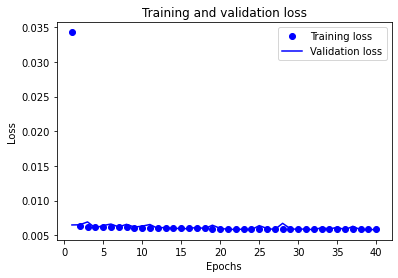

In [40]:
acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

1409/1409 [==============================] - 1s 926us/step - loss: 0.0059 - mae: 0.0617


In [42]:
model.save('score_prediction_2.h5')

In [51]:
model = load_model('score_prediction.h5')

In [53]:
predicted = model.predict([[0.8081, 0.666667, 0.33333, 0.2]])
predicted   

array([[0.7982243]], dtype=float32)